<a href="https://colab.research.google.com/github/adil-ak/machine_learning/blob/main/10Jan_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

<ipython-input-6-6a39bd747783>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-6-6a39bd747783>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


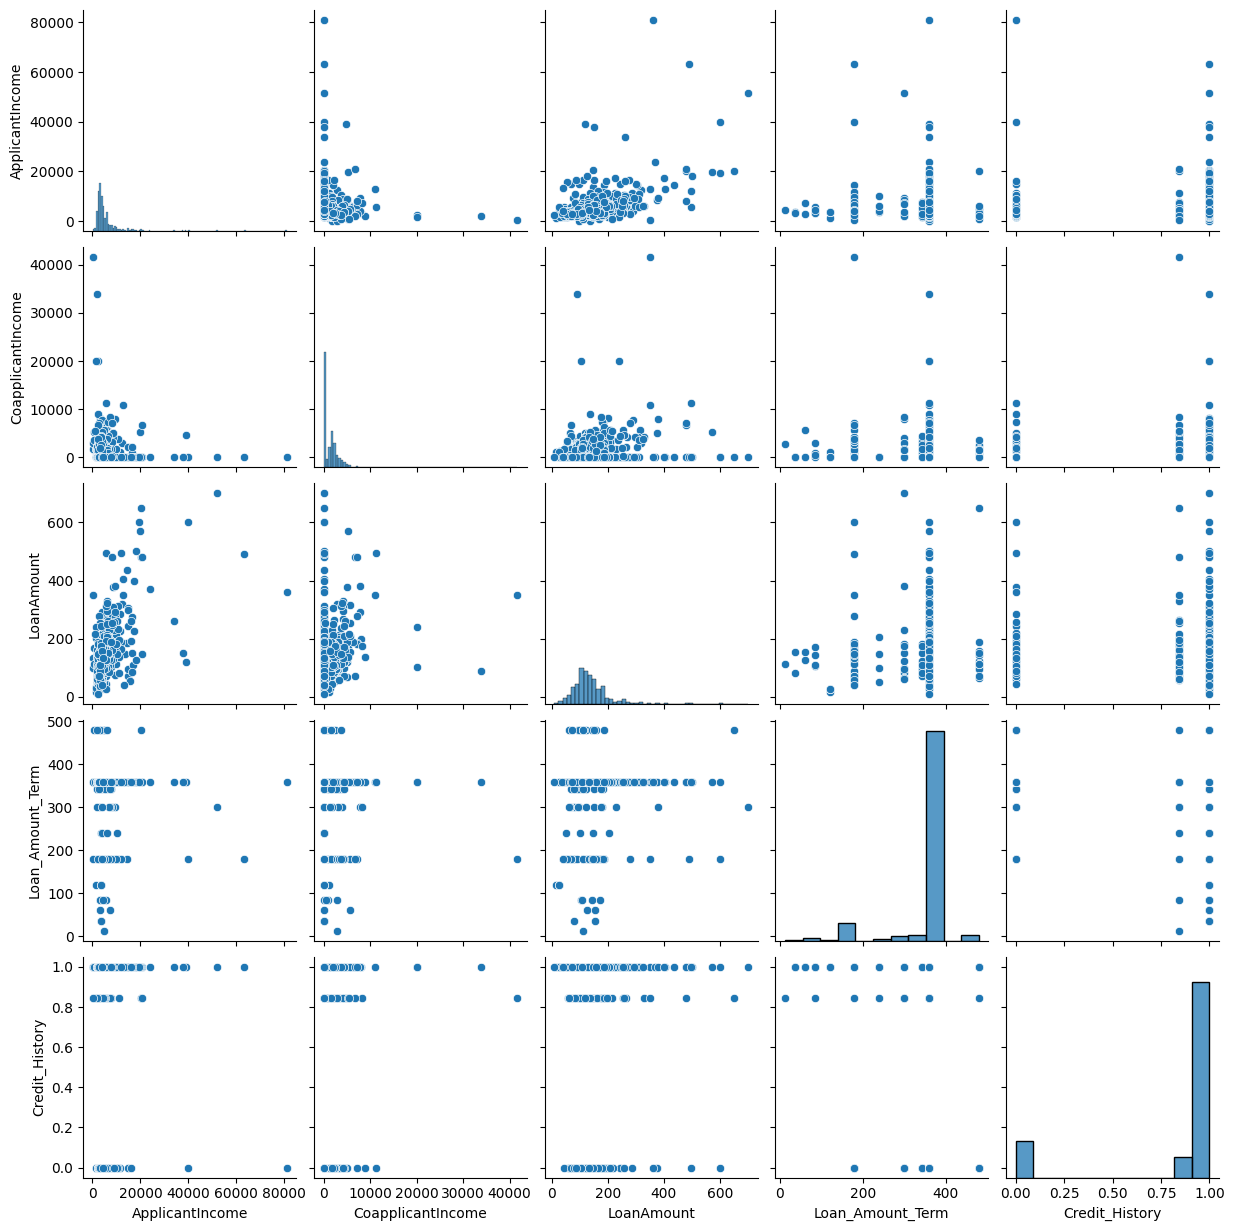

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
df=encoder.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.0,146.412162,360.0,1.0,1,1
1,1,2,2,1,1,4583,1508.0,128.000000,360.0,1.0,2,2
2,1,2,1,1,2,3000,0.0,66.000000,360.0,1.0,1,1
3,1,2,1,2,1,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,1,1,1,1,6000,0.0,141.000000,360.0,1.0,1,1


In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#Apply Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,


LogisticRegression()

In [ ]:
model.score(x_test,y_test)*100

80.48780487804879

#Using GridSearch CV

In [ ]:
C_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
penalties=['l1','l2']
perameters={'C':C_values,'penalty':penalties}

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=perameters,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,
/usr/local/lib/python3

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.8126777983920841

In [ ]:
grid.best_params_

{'C': 9, 'penalty': 'l2'}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[82,  2],
       [23, 16]])

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modeltree=DecisionTreeClassifier()
modeltree.fit(x_train,y_train)
model.score(x_test,y_test)*100

80.48780487804879

In [ ]:
parameters={'max_depth':[5,10,15,20,25,30,35,40,45,50],'min_samples_leaf':[10,20,50,100,50],'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'min_samples_leaf': [10, 20, 50, 100, 50]},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.8106575963718822

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[83,  1],
       [23, 16]])

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(algorithm='auto',n_neighbors=8,weights='uniform')
knn_model.fit(x_train,y_train)

knn_model.score(x_test,y_test)*100

64.22764227642277

In [ ]:
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters,scoring='accuracy',cv=4)

grid.fit(x_train,y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ddc6ee0f910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.6761795281887245

In [ ]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)

model_ada.score(x_test,y_test)*100

80.48780487804879

In [ ]:
parameters={'n_estimators':[6,100,200,150,180,95,85,102,120]}
grid=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [6, 100, 200, 150, 180, 95, 85, 102,
                                          120]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_estimators': 150}

In [ ]:
grid.best_score_

0.8167800453514739

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)

model_gb.score(x_test,y_test)*100

78.86178861788618

In [ ]:
parameters={'loss':['log_loss','exponential'],'learning_rate':[0.1,0.2,0.3,1.0,1.2,2.0]}
grid=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 1.0, 1.2, 2.0],
                         'loss': ['log_loss', 'exponential']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'loss': 'exponential'}

In [ ]:
grid.best_score_

0.7963924963924963

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

model_rf.score(x_test,y_test)*100

76.42276422764228

In [ ]:
parameters={'n_estimators':[1,2,3,4,5,6,10,20,50,100],'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 20}

In [ ]:
grid.best_score_*100

81.26777983920842

#Bagging Classifier

In [44]:
from sklearn.ensemble import BaggingClassifier
model_bg=BaggingClassifier()
model_bg.fit(x_train,y_train)

model_bg.score(x_test,y_test)*100

78.86178861788618

In [45]:
parameters={'n_estimators':[1,2,3,4,5,6,7,8,9,10],'max_samples':[1.0,2.0,3.0,4.0]}
grid=GridSearchCV(estimator=BaggingClassifier(),param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    fit_params = _check_method_params(X, params=fit_params, indices=train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    def inner_f(*args, **kwargs):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    >>> is_classifier(regressor)
  File "/usr/local/lib/python3.10/di

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [46]:
grid.best_params_

{'max_samples': 1.0, 'n_estimators': 10}

In [47]:
grid.best_score_*100

78.01278086992373

#Voting Classifier

In [50]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

In [52]:
from sklearn.ensemble import VotingClassifier
estimators=[('random_forest',rf),('decision_tree',dt),('logistic_regression',lr)]
model_vc=VotingClassifier(estimators)
model_vc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,


VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('decision_tree', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression())])

In [53]:
model_vc.score(x_test,y_test)*100

78.86178861788618

In [55]:
parameters={'voting':['hard','soft']}
grid=GridSearchCV(estimator=model_vc,param_grid=parameters,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,
/usr/local/lib/python3

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('random_forest',
                                                     RandomForestClassifier()),
                                                    ('decision_tree',
                                                     DecisionTreeClassifier()),
                                                    ('logistic_regression',
                                                     LogisticRegression())]),
             param_grid={'voting': ['hard', 'soft']}, scoring='accuracy')

In [56]:
grid.best_params_

{'voting': 'hard'}

In [57]:
grid.best_score_*100

79.63306534735108